# CS 1656 – Introduction to Data Science (Spring 2023) 

## Instructor: Alexandros Labrinidis / Teaching Assistant: E. Karageorgos

### Additional Credits: Xiaoting Li, T. Arabghalizi, P. Pham, A. Shein, Z. Agha
---
In this recitation you will be learning pandas dataframe basics and plotting in Python. In the end you will see an example for NLTK that is related to your first assignment. 

Packages you will need are,
* pandas
* matplotlib

First step is to import the packages above. If import fails, it means that the package is not installed and you need to install the package using "pip install package_name".

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import io
import requests

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [4]:
%matplotlib inline

## Dataframe Basics

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table. DataFrame accepts many different kinds of input:
*Dict of 1D ndarrays, lists, dicts, or Series
*2-D numpy.ndarray
*Structured or record ndarray
*A Series
*Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments.

Now what is a Series?
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). You can think of it as a 1-dimensional dataframe. Series objects can also have index. 
### Creating a Dataframe
We will start off by creating  a dataframe from Weather Undergraound Data retreived from the url below.

In [6]:
r = io.StringIO(requests.get('http://data.cs1656.org/KPIT_Aug17.csv', verify=False).content.decode('utf-8'))
df = pd.read_csv(r,\
                       sep=',', engine='python', parse_dates=['EST'])

C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'db.cs.pitt.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


To display the top 'n' rows of the dataframe, use the head() command below. The default is 5 rows.

In [5]:
df.head()

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean Sea Level Press.,Min Sea Level Press.,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Min Wind SpeedMPH,PrecipitationIn,Events
0,2017-08-01,84,73,62,65,61,58,93,67,40,...,30.12,30.07,10,10,10,12,3,16,0,NaN
1,2017-08-02,84,75,65,66,64,60,93,70,47,...,30.08,30.04,10,10,10,13,3,16,0,NaN
2,2017-08-03,84,75,65,66,64,62,93,71,48,...,30.07,30.01,10,10,10,14,5,17,0,NaN
3,2017-08-04,83,73,62,68,65,58,90,73,55,...,29.93,29.82,10,9,2,32,9,39,0.41,"Rain , Thunderstorm"
4,2017-08-05,74,66,58,61,54,49,87,68,49,...,30.04,29.94,10,10,10,15,10,22,T,NaN


Now to find all the column names of the dataframe and their data types, type the following command.

In [6]:
df.dtypes

EST                      datetime64[ns]
Max TemperatureF                  int64
Mean TemperatureF                 int64
Min TemperatureF                  int64
Max Dew PointF                    int64
MeanDew PointF                    int64
Min DewpointF                     int64
Max Humidity                      int64
Mean Humidity                     int64
Min Humidity                      int64
Max Sea Level Press.            float64
Mean Sea Level Press.           float64
Min Sea Level Press.            float64
Max VisibilityMiles               int64
Mean VisibilityMiles              int64
Min VisibilityMiles               int64
Max Wind SpeedMPH                 int64
Mean Wind SpeedMPH                int64
Min Wind SpeedMPH                 int64
PrecipitationIn                  object
Events                           object
dtype: object

Notice the type of 'EST' column. We will find out why that's relevant a few steps later.
### Accessing Dataframe Columns
There are two ways to access a dataframe column. 
The first way is accessing it like a dictionary as shown below. We will be using head function to show the first few rows only.

In [7]:
df['EST'].head()

0   2017-08-01
1   2017-08-02
2   2017-08-03
3   2017-08-04
4   2017-08-05
Name: EST, dtype: datetime64[ns]

The second way is to access using dot. But this only works if the column name is a valid variable name without any spacing.

In [8]:
df.EST.head()

0   2017-08-01
1   2017-08-02
2   2017-08-03
3   2017-08-04
4   2017-08-05
Name: EST, dtype: datetime64[ns]

You can also access multiple columns by passing list of column names.

In [9]:
df[['EST','Mean TemperatureF']].head()

,EST,Mean TemperatureF
0,2017-08-01,73
1,2017-08-02,75
2,2017-08-03,75
3,2017-08-04,73
4,2017-08-05,66


---
## Plotting
### Basic Plot

Now lets start with basic plotting in Python first. We will use the plot function. Note that plot returns a tuple of handle and labels. If you need the plot handle in the future you will assign a variable to the plot function's return value.

In [2]:
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

NameError: name 'plt' is not defined

That does not look too pretty. Let's format the graph and plot again. 

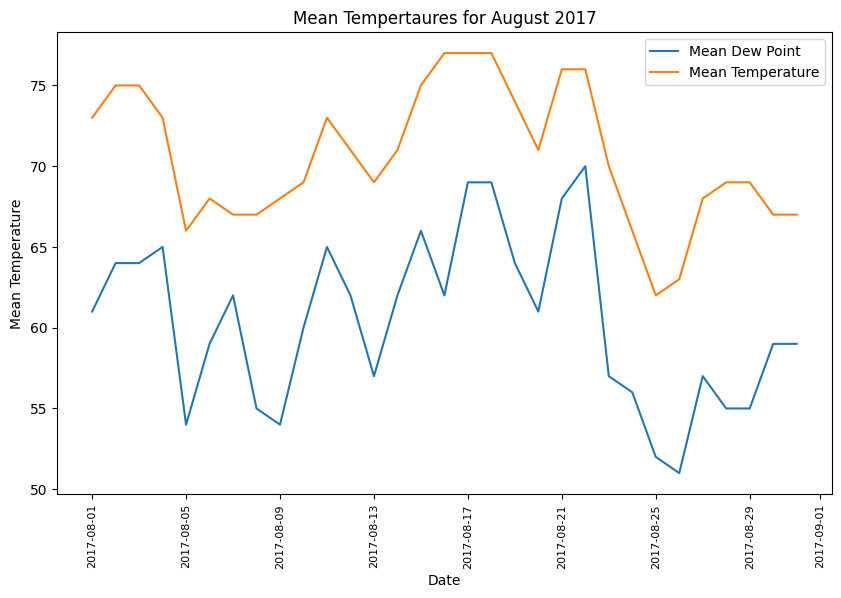

In [11]:
# Initializing a larger figure
fig = plt.figure(figsize=(10, 6))

# PLotting
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

# Formatting graph
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Tempertaures for August 2017')

# Are we ready to show the formatted graph now? Not yet. Because we want
# to save our graph figure this time.In order to use the save command, it
# is important to save before the show command because the show command
# clears the axis of the figure after displaying.

plt.savefig("basic_plot.png")
plt.show()

### Bar Plot

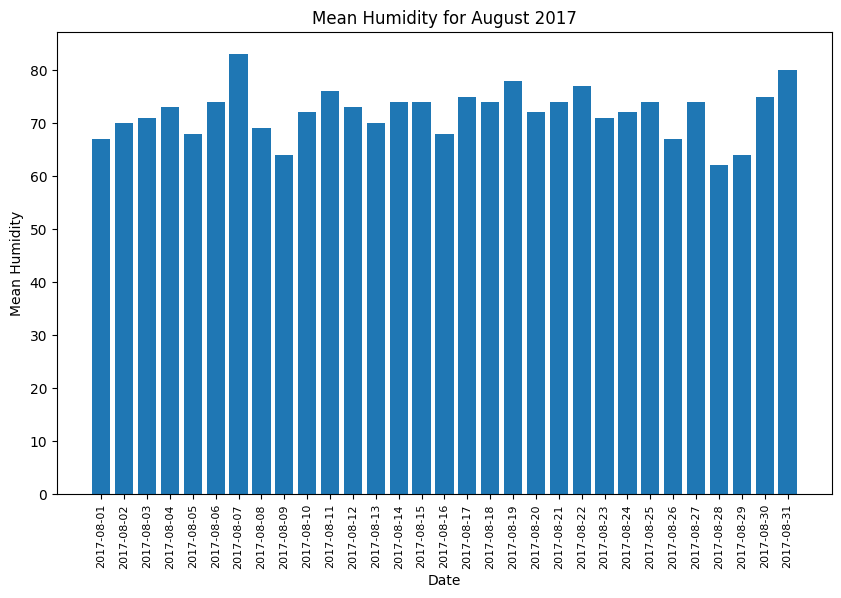

In [12]:
fig = plt.figure(figsize=(10, 6))
#plt.bar(df['EST'],df['Mean Humidity'], align = 'center') # doesn't guarantee proper ordering
plt.bar(range(len(df['EST'])),df['Mean Humidity'], align = 'center')

# Formatting graph
plt.xticks(range(len(df['EST'])), df['EST'].dt.strftime('%Y-%m-%d'),\
               rotation = 90, fontsize = 8)
plt.xlabel('Date')
plt.ylabel('Mean Humidity')
plt.title('Mean Humidity for August 2017')

plt.savefig("bar_plot.png")
plt.show()

Now, lets try to plot the two graphs above on the same figure using subplots. The code for plotting is the same as that shown above. 

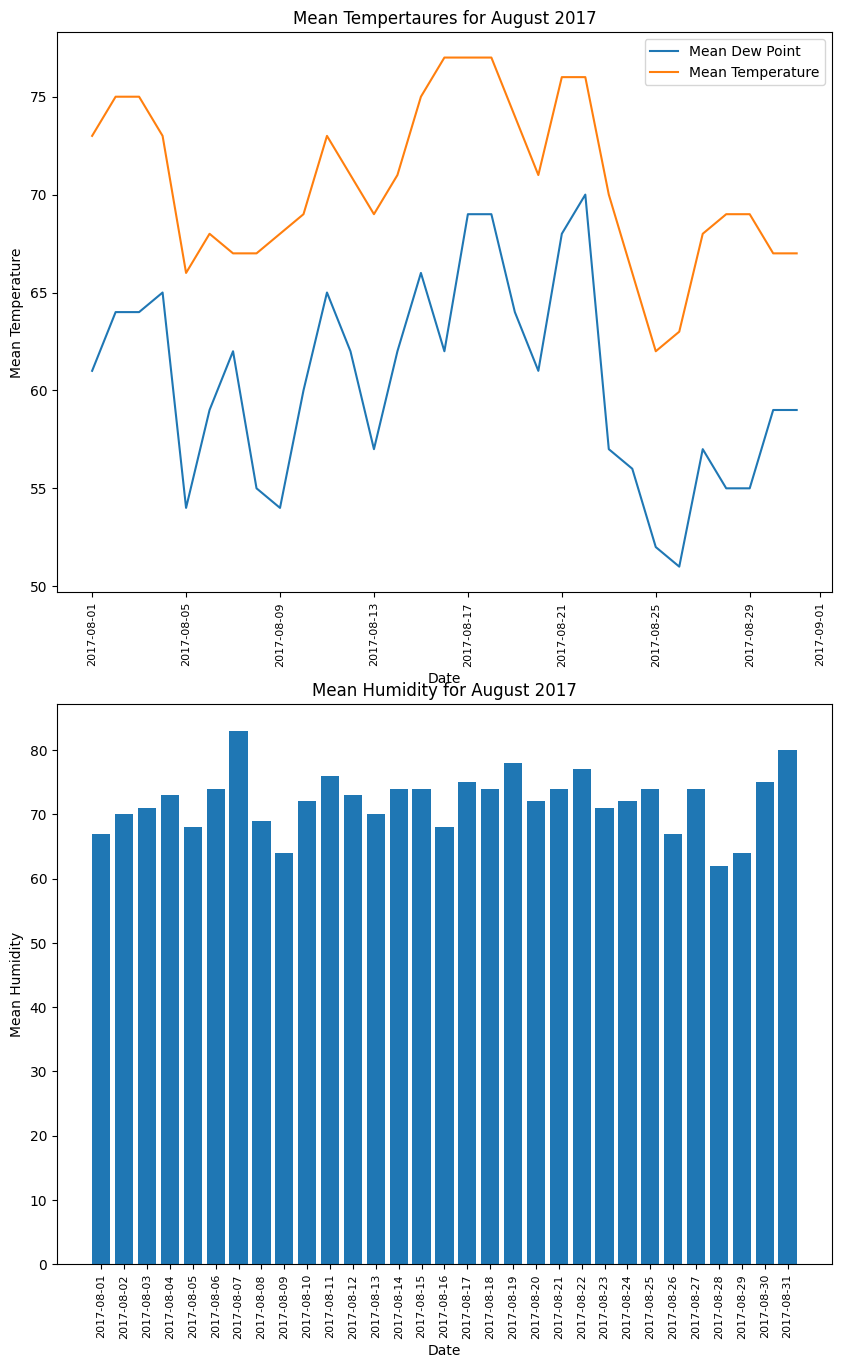

In [13]:
fig = plt.figure(figsize=(10, 16))

# Subplot of basic graph
plt.subplot(211)
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Tempertaures for August 2017')

# Subplot of bar graph graph
plt.subplot(212)
plt.bar(range(len(df['EST'])),df['Mean Humidity'], align = 'center')

plt.xticks(range(len(df['EST'])), df['EST'].dt.strftime('%Y-%m-%d'),\
               rotation = 90, fontsize = 8)
plt.xlabel('Date')
plt.ylabel('Mean Humidity')
plt.title('Mean Humidity for August 2017')

plt.savefig("subplot_basic_bar.png")
plt.show()

What is the advantage of subplots? It allows us to establish relationships between different variables and different statistics. Looking at the two subplots above, do you notice any relationship?

### Scatter Plot
Scatter plots are commonly used to show correlation between variables. If the data points make a straight line going from the origin out to high x and high y values, then the variables are said to have a positive correlation. If the line goes from a high value on the y-axis down to a high value on the x-axis, the variables have a negative correlation. The closer the data points in the scatter plot, the higher the correlation between the two variables, or the stronger the relationship.

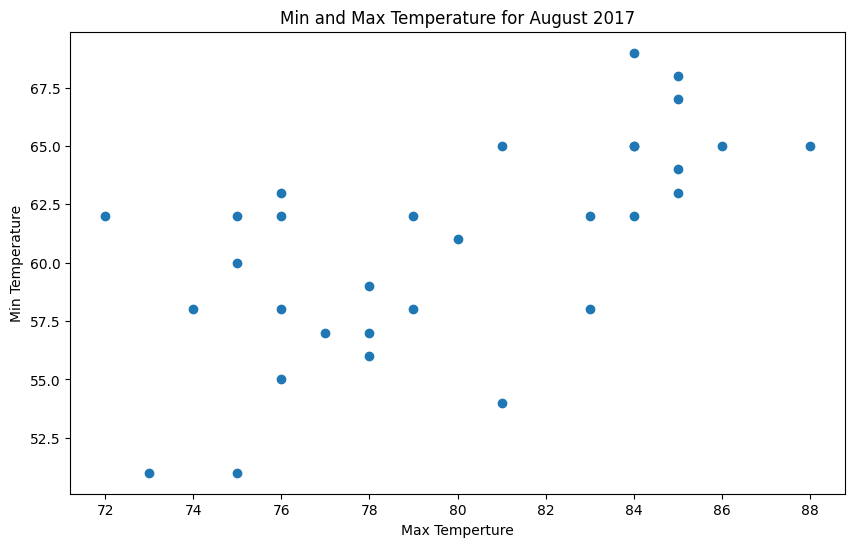

In [14]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(df['Max TemperatureF'],df['Min TemperatureF'])

# Formatting graph
plt.xlabel('Max Temperture')
plt.ylabel('Min Temperature')
plt.title('Min and Max Temperature for August 2017')

plt.savefig("scatter_plot.png")
plt.show()

The graph above shows us that min and max temperature have a strong positive correlation.

# NLTK and Stemming:
Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal 
correctly most of the time, and often includes the removal of derivational affixes.  

In [16]:
import nltk
nltk.download('punkt')
mysentence = """During a manned mission to Mars, Astronaut Mark Watney 
            (Matt Damon) is presumed dead after a fierce storm and left behind 
            by his crew.But Watney has survived and finds himself stranded and alone on the hostile planet."""

mysentencetokens = nltk.word_tokenize(mysentence)
#Stemming
porter = nltk.PorterStemmer()
looper = 0
for token in mysentencetokens:
        mysentencetokens[looper] = porter.stem(token)
        looper += 1
print ("Stemmed -->")
print (mysentencetokens)

ModuleNotFoundError: No module named 'nltk'

**Task 1** 

Plot a scatter plot of with 'land area' on the x-axis and '2014 estimate' on the y-axis. After observing the plot, do you think the two variables are strongly or weakly correlated? Is the correlation positive or negative?

## Tasks
For your tasks, the input file is available at http://data.cs1656.org/top12cities.csv. The file consists of population density estimates and land area of several cities in USA. 

You need to read the file into a dataframe and perform the following three tasks during the lab. 

In [8]:
i = io.StringIO(requests.get('http://data.cs1656.org/top12cities.csv', verify=False).content.decode('utf-8'))
df2 = pd.read_csv(i,\
                       sep=',', engine='python')


C:\Users\arhat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'db.cs.pitt.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [9]:
df2.head()

,2014 rank,City,State,2014 estimate,2010 Census,Change,2014 land area
0,1,New York,New York,8491079,8175133,3.86%,302.6
1,2,Los Angeles,California,3928864,3792621,3.59%,468.7
2,3,Chicago,Illinois,2722389,2695598,0.99%,227.6
3,4,Houston,Texas,2239558,2100263,6.63%,599.6
4,5,Philadelphia,Pennsylvania,1560297,1526006,2.25%,134.1


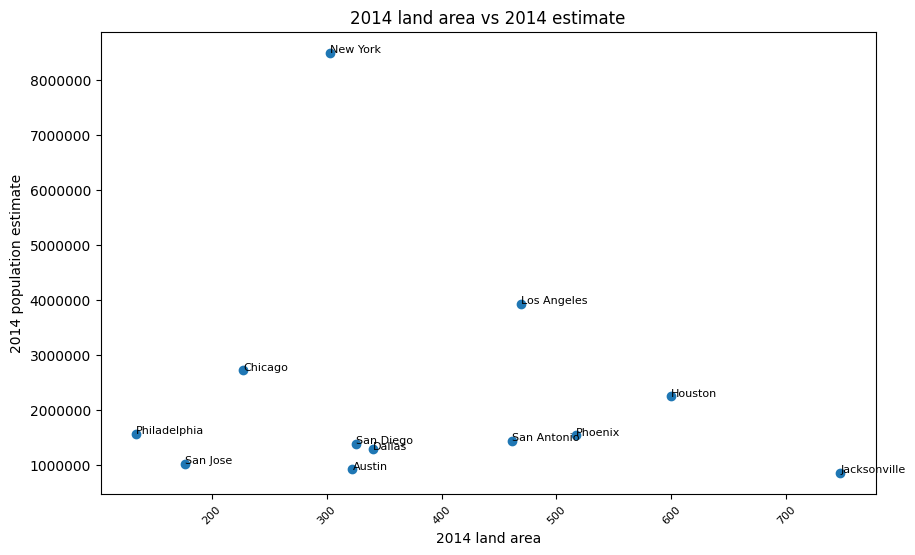

In [55]:

fig = plt.figure(figsize=(10, 6))
#setting format for graph
plt.ticklabel_format(style = 'plain')
#creating actual scatterplot
plt.scatter(df2['2014 land area'], df2['2014 estimate'])

#x and y labels
plt.xticks(rotation = 45, fontsize = 8)
#xlabel
plt.xlabel('2014 land area')
#ylabel
plt.ylabel('2014 population estimate') 
#title
plt.title('2014 land area vs 2014 estimate')

#howing each name city for each point
for i, txt in enumerate(df2['City']):
    plt.annotate(txt, (df2['2014 land area'][i], df2['2014 estimate'][i]), fontsize=8)

plt.show()



**Task 2** 

Plot a bar plot showing each city's 2014 population estimate given by '2014 estimate' column. 

Text(0.5, 1.0, 'City Population estimate in 2014')

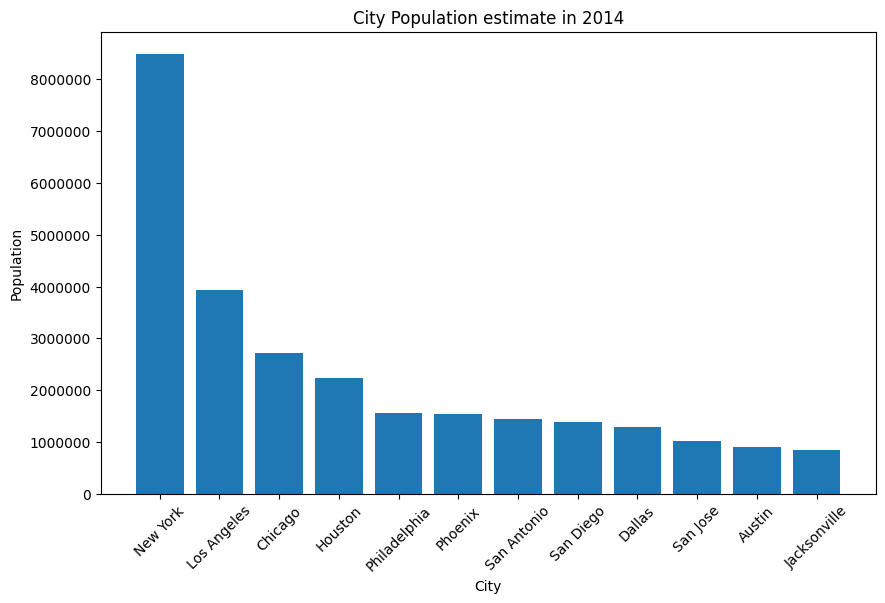

In [54]:
fig = plt.figure(figsize=(10,6))

plt.ticklabel_format(style = 'plain')
plt.bar(df2['City'], df2['2014 estimate'], align= 'center')

plt.xlabel('City')
plt.xticks(rotation = 45 )
plt.ylabel('Population')
plt.title('City Population estimate in 2014')

**Task 3** 

Now that you plotted a simple bar plot, try plotting a grouped bar plot that shows both 2010 and 2014 estimate for each city on the same plot. This means that there will be two grouped bars per city on your graph. 


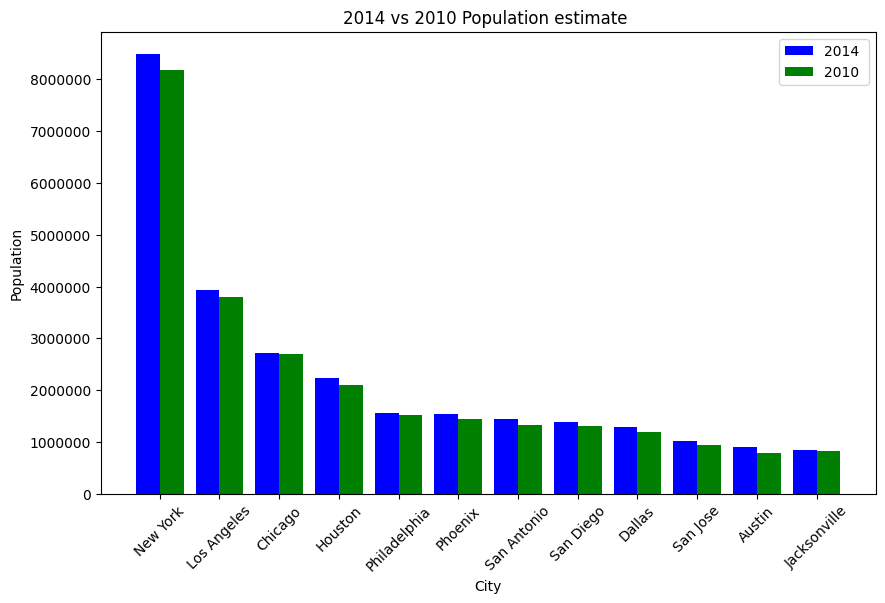

In [53]:
fig = plt.figure(figsize = (10,6))

plt.ticklabel_format(style = 'plain')
p3 = plt.bar(df2['City'].index - 0.2, df2['2014 estimate'], align = 'center', color = 'b', width = 0.4)
p4 = plt.bar(df2['City'], df2['2010 Census'], align = 'edge', color = 'g', width = 0.4)

plt.legend(('2014 ', '2010 '))
plt.xlabel('City')
plt.xticks(rotation = 45)
plt.ylabel('Population')
plt.title('2014 vs 2010 Population estimate ')

plt.show()


#combining the figures

